# Assignment 1

You will perform simple data preprocessing on `bnb.csv` dataset.

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy

In [3]:
df = pd.read_csv('bnb.csv')
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


The size of this dataset:

In [4]:
df.shape

(48895, 16)

Summary stats of this dataset:

In [5]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


NAs in dataset:

In [6]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Q1: (1 point) Remove all rows with zero availability in the whole year, i.e., zero in the column of "availability_365".

In [7]:
df_q1 = df[df.availability_365 > 0]
df_q1.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [8]:
## check
# df.shape[0] - df_q1.shape[0] == df[df.availability_365==0].shape[0]

Q2: (1 point) Remove all rows with unreasonable price, i.e., the "price" is higher than $2,000 per night.

In [9]:
df_q2 = df_q1[df_q1.price <= 2000]
df_q2.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [10]:
## check
# df_q1.shape[0] - df_q2.shape[0] == df_q1[df_q1.price > 2000].shape[0]

Q3: (1 point) Remove all rows for long-term tenant only, i.e., "minimum_nights" is no smaller than 30 days.

In [11]:
df_q3 = df_q2[df_q2.minimum_nights < 30]
df_q3.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [12]:
## check
# df_q2.shape[0] - df_q3.shape[0] == df_q2[df_q2.minimum_nights >= 30].shape[0]

Q4: (1 point) Remove all rows with zero "number_of_reviews"

In [13]:
from copy import deepcopy as dcpy
import numpy as np
no_reviews = dcpy(df_q3)
no_reviews['temp_flag'] = np.where(no_reviews.number_of_reviews==0,True,False)
df_q4 = no_reviews[no_reviews.temp_flag == False]
df_q4 = df_q4.drop('temp_flag', axis=1)
df_q4.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220


Q5: (2 point) Explore the columns of "last_review" and "number_of_reviews". Replace the missing value of "last_review" with a default value.

In [14]:
df_q4.isna().sum()

id                                0
name                              2
host_id                           0
host_name                         6
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

Note: Since "number_of_reviews" ==0 were removed, all the rows with missing values for "last_review" were removed. This is verified when checking dataframe.isna at the start and after 4 questions.
Hence, no substitution is needed.

But in order to show substitution as required in the question, see below for substitution on original df.

In [15]:
df_substitution = dcpy(df)
df_substitution['last_review'] = df_substitution['last_review'].fillna(0)
df_substitution

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0,NaN,6,2


Q6: (2 point) A valid "host_name" is expected to contain only English letters and numeric symbols. Please use regular expression to find invalid "host_name" values and remove the rows.

In [16]:
# omit missisng values
df_q6 = df_q4.dropna(subset=['host_name'])
df_q6 = df_q6[df_q6['host_name'].str.contains(r'[a-zA-Z0-9]+',regex=True)]

In [17]:
## check
df_q6.isna().sum()

id                                0
name                              2
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

Q7: (2 point) Create a scatter plot over the latitude and longitude of the rooms. 

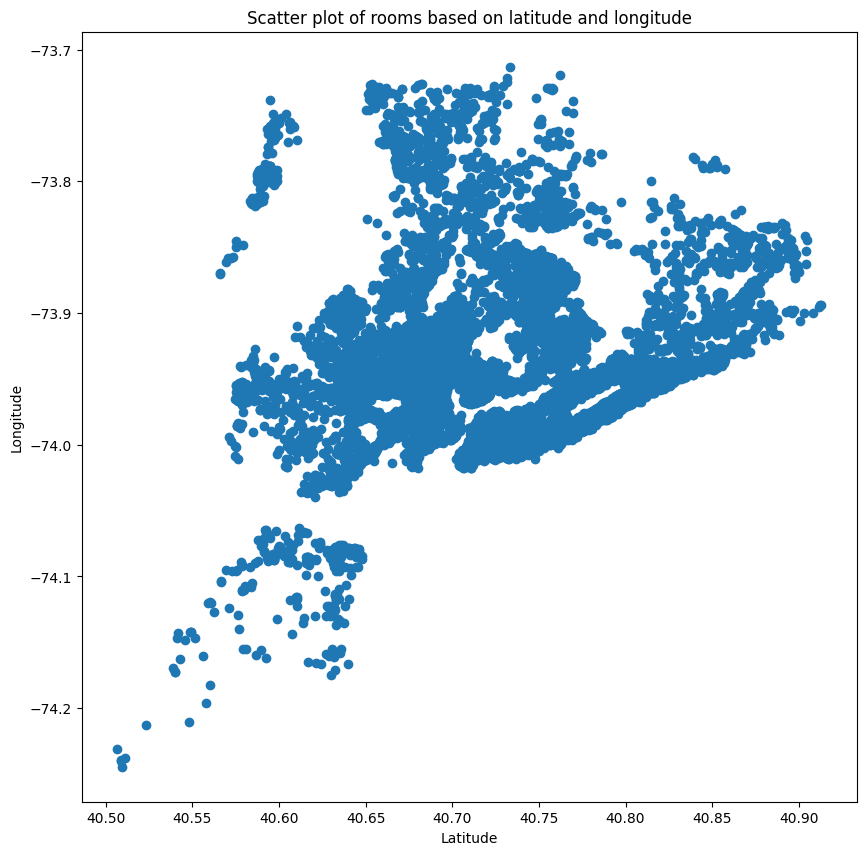

In [18]:
plt.style.use('default')

fig = plt.figure(figsize=(10,10))
plt.scatter(df_q6['latitude'],df_q6['longitude'])

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Scatter plot of rooms based on latitude and longitude')

plt.show()

Q8: (1 point) Check if there is replicate id in the rows

In [19]:
sum(df_q6['id'].duplicated())

0

Notes: Since sum of df_q6['id'].duplicated() = 0, it means there are 0 True values in the series output from df_q6['id'].duplicated(). Hence no replicated IDs.

Q9: (4 point) Split the dataset into 80% training, 10% validation, and 10% test using SKLearnProcessor.

In [1]:
# %pip install -U sagemaker

In [70]:
## initialise

import sagemaker
from sagemaker import get_execution_role
from sagemaker.sklearn.processing import SKLearnProcessor
import pandas as pd
import os
from sklearn.model_selection import train_test_split

region = sagemaker.Session().boto_region_name
role = get_execution_role()
sklearn_processor = SKLearnProcessor(
    framework_version="1.2-1", role=role, instance_type="ml.m5.xlarge", instance_count=1
)


In [ ]:
## run processing to create train-test-val splits

input_data_path = os.path.join("/opt/ml/processing/input", "dataset.csv")
df = pd.read_csv(input_data_path)
print("Shape of data is:", df.shape)
train, test = train_test_split(df, test_size=0.2)
train, validation = train_test_split(train, test_size=0.2)

try:
    os.makedirs("/opt/ml/processing/output/train")
    os.makedirs("/opt/ml/processing/output/validation")
    os.makedirs("/opt/ml/processing/output/test")
    print("Successfully created directories")
except Exception as e:
    # if the Processing call already creates these directories (or directory otherwise cannot be created)
    print(e)
    print("Could not make directories")
    pass

try:
    train.to_csv("/opt/ml/processing/output/train/train.csv")
    validation.to_csv("/opt/ml/processing/output/validation/validation.csv")
    test.to_csv("/opt/ml/processing/output/test/test.csv")
    print("Wrote files successfully")
except Exception as e:
    print("Failed to write the files")
    print(e)
    pass

print("Completed running the processing job")